# Introduction 

This dataset is extracted from 570 cancer cells. It contains 30 features. The main object of this study is to find the best model to classify cancer dataset into 2 types of cancers: 0. benign cancer (B) and 1. malignant cancer (M).

# I- Download libraries 

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [145]:
# Machine learning package
import sklearn
import sklearn.preprocessing
import sklearn.feature_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# II- Load  dataset

In [210]:
cancer_df= pd.read_csv("Cancer_Data.csv")

- Dataset description:

In [203]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The target variable of the dataset is diagnosis, It has two values and 2 types of cancers: 1. benign cancer (B) and 2. malignant cancer (M).

In [148]:
cancer_df.shape
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# III-EDA:

# 1- Missing values check

In [116]:
cancer_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

No missing values in the dataset 

In [179]:
# Check for NaN values in each column
nan_columns = cancer_df.columns[cancer_df.isna().any()].tolist()

if len(nan_columns) > 0:
    print("NaN values found in the following columns:")
    print(nan_columns)
else:
    print("No NaN values found in any column.")

NaN values found in the following columns:
['Unnamed: 32']


In [211]:
cancer_df= cancer_df.drop(['Unnamed: 32'], axis= 1)

# 2- Summary statistics and variables description :

In [212]:
#variables description without the id and Unnamed: 32 columns:
cancer_df.drop(["id"], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [182]:
#correlation between variables 
round(cancer_df.drop(["id"], axis=1).corr(),2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,...,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44
fractal_dimension_mean,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,...,-0.25,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77


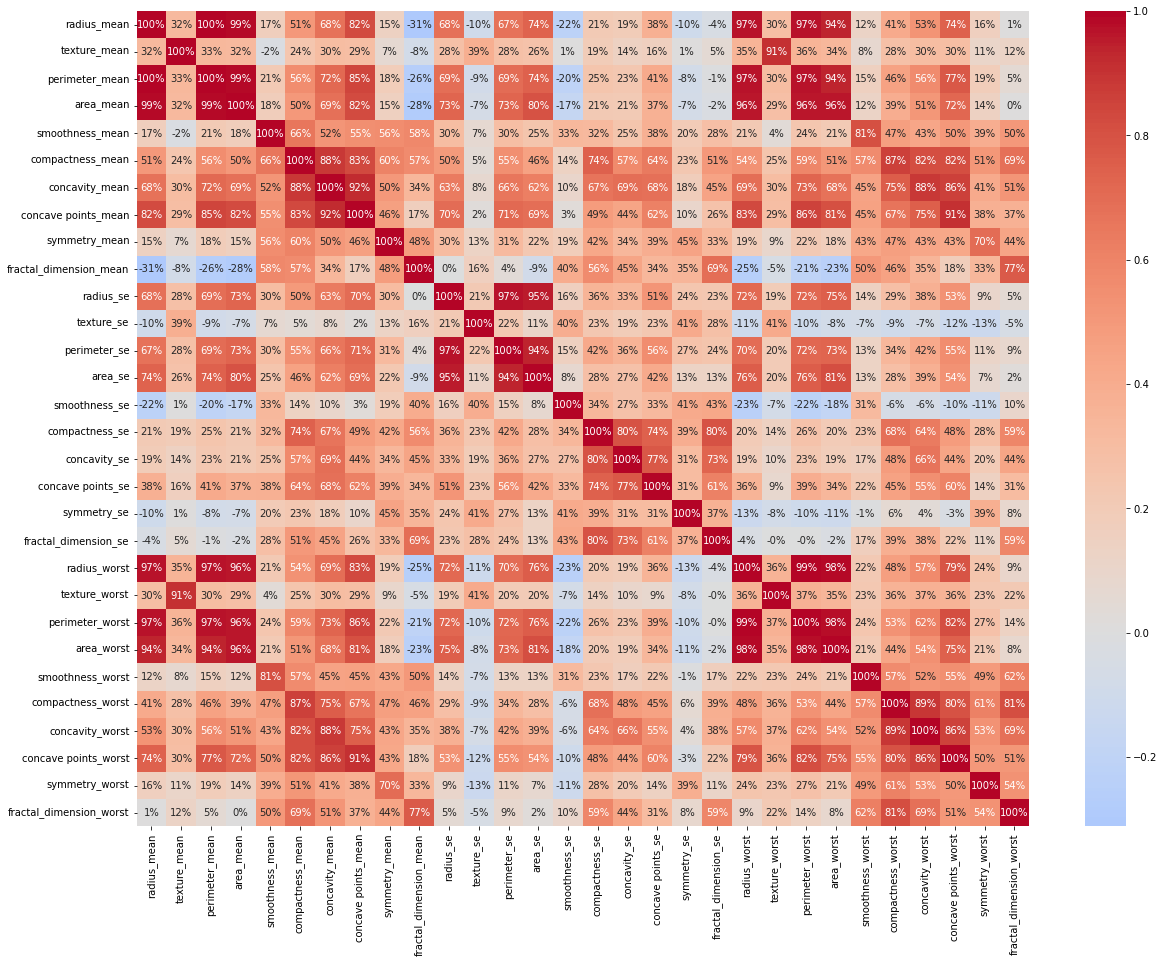

In [66]:
#Heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(cancer_df.drop(["id"], axis=1).corr(), center =0, annot=True,fmt='.0%',cmap='coolwarm')
plt.show()

# Target variable study :
The target variable of the dataset is diagnosis, It has two values and 2 types of cancers: 1. benign cancer (B) and 2. malignant cancer (M).

In [213]:
#The target variable is diagnosis and the explanatory variables X
X= cancer_df.drop("diagnosis", axis= 1)
target = cancer_df["diagnosis"]

[Text(0, 0, '62.7417'), Text(0, 0, '37.2583')]

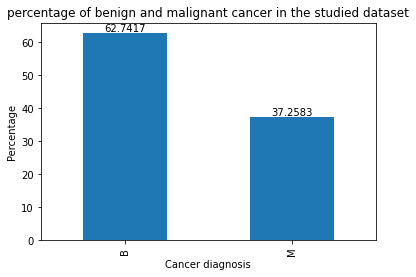

In [214]:
x=target.value_counts()
y=len(target)
z=(x/y)*100
ax=z.plot.bar()
ax.set_title("percentage of benign and malignant cancer in the studied dataset")
ax.set_xlabel("Cancer diagnosis")
ax.set_ylabel("Percentage")
rects = ax.patches
ax.bar_label(ax.containers[0])

There is 62.7% benign and 37.3% malignant case in the studied dataset 

In [215]:
cancer_df['diagnosis'] = cancer_df['diagnosis'] .map({'B':0, 'M':1})
display(cancer_df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Skewness study 

In [154]:
cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

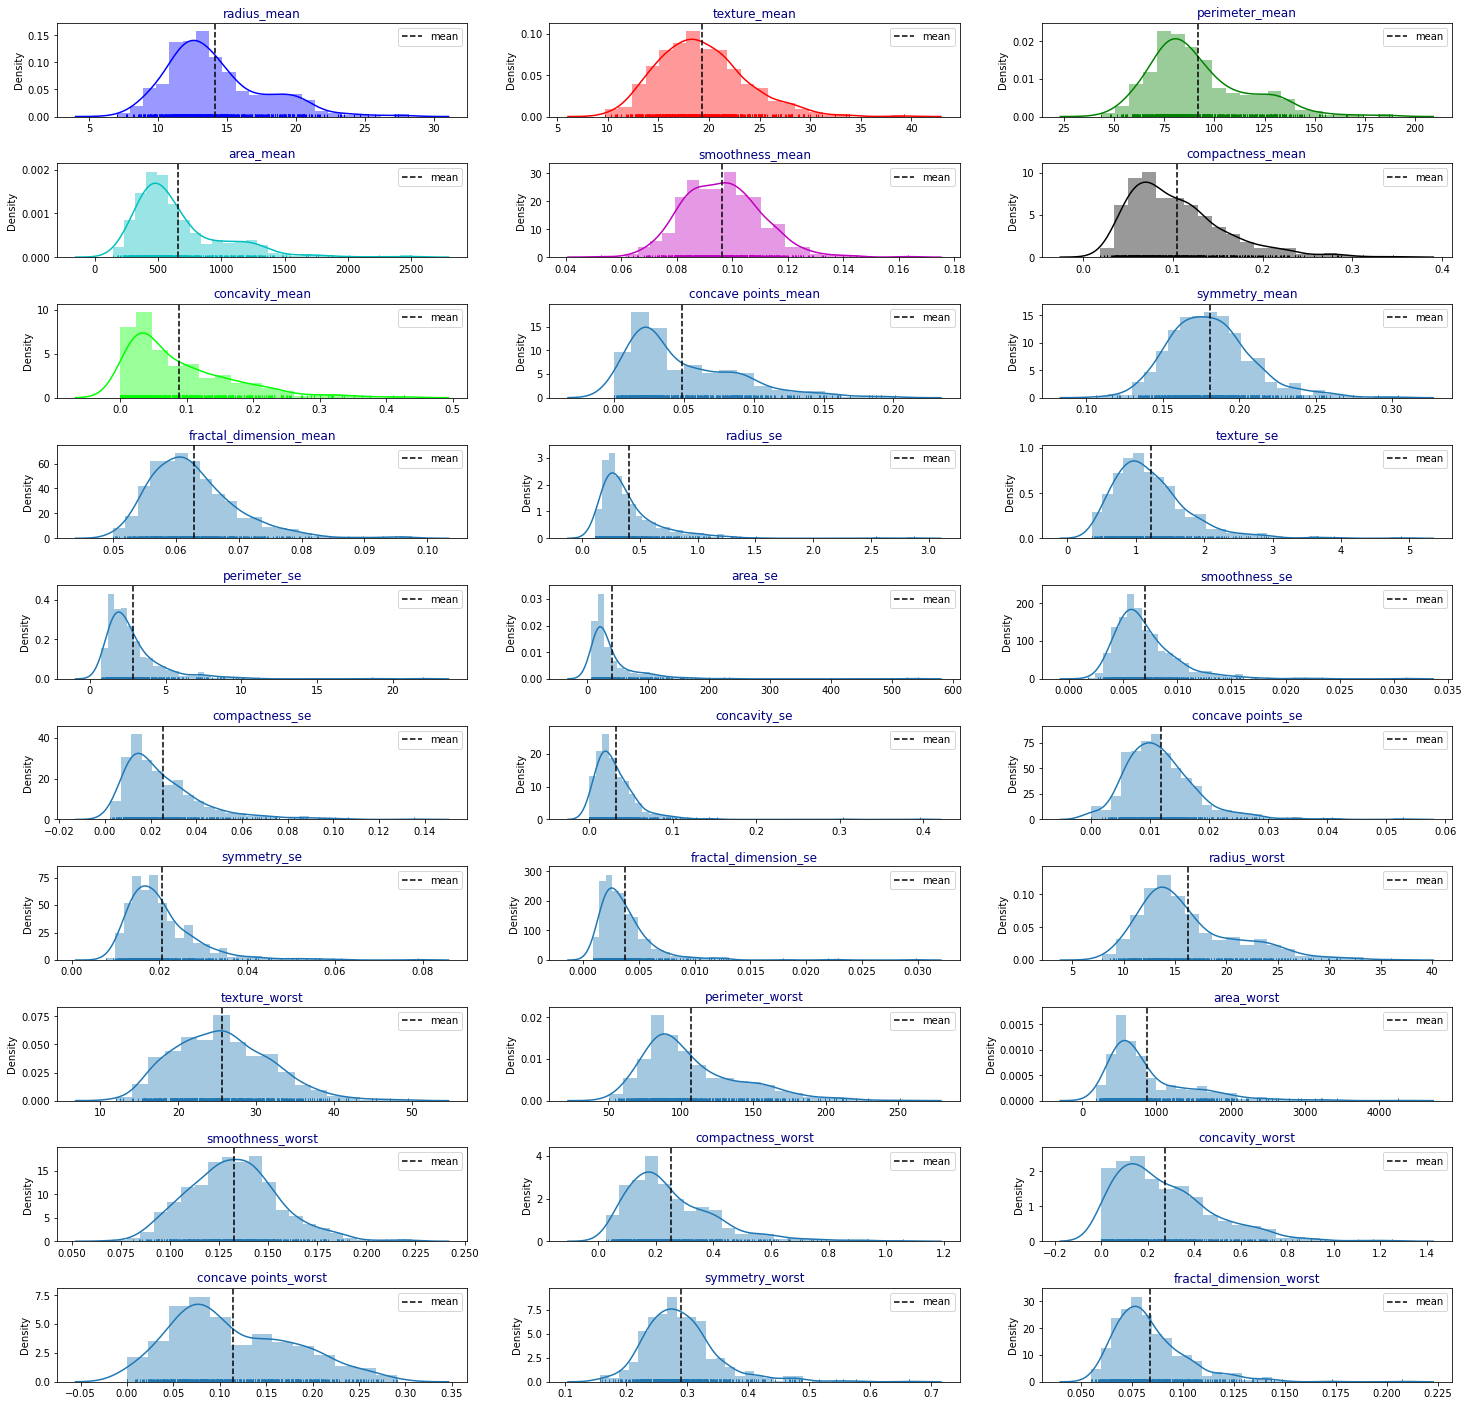

In [155]:
import itertools
# Filter out the specific FutureWarning generated by seaborn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

cols=[ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
length=len(cols)
cs=["b","r","g","c","m","k","lime"]
fig=plt.figure(figsize=(25,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(10,3,j+1)
    # Adjust the spacing between subplots
    plt.subplots_adjust(hspace=0.5)
    ax=sns.distplot(cancer_df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(cancer_df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")
plt.show()

- Skewness removal 

In [171]:
from sklearn.preprocessing import power_transform     #box-cox is only for positive but yeo-johnson is for both negative and positive
X1=power_transform(X,method='yeo-johnson')

In [172]:
X1.shape

(569, 32)

No change 

# Outliner study

In [173]:
cancer_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<function matplotlib.pyplot.show(close=None, block=None)>

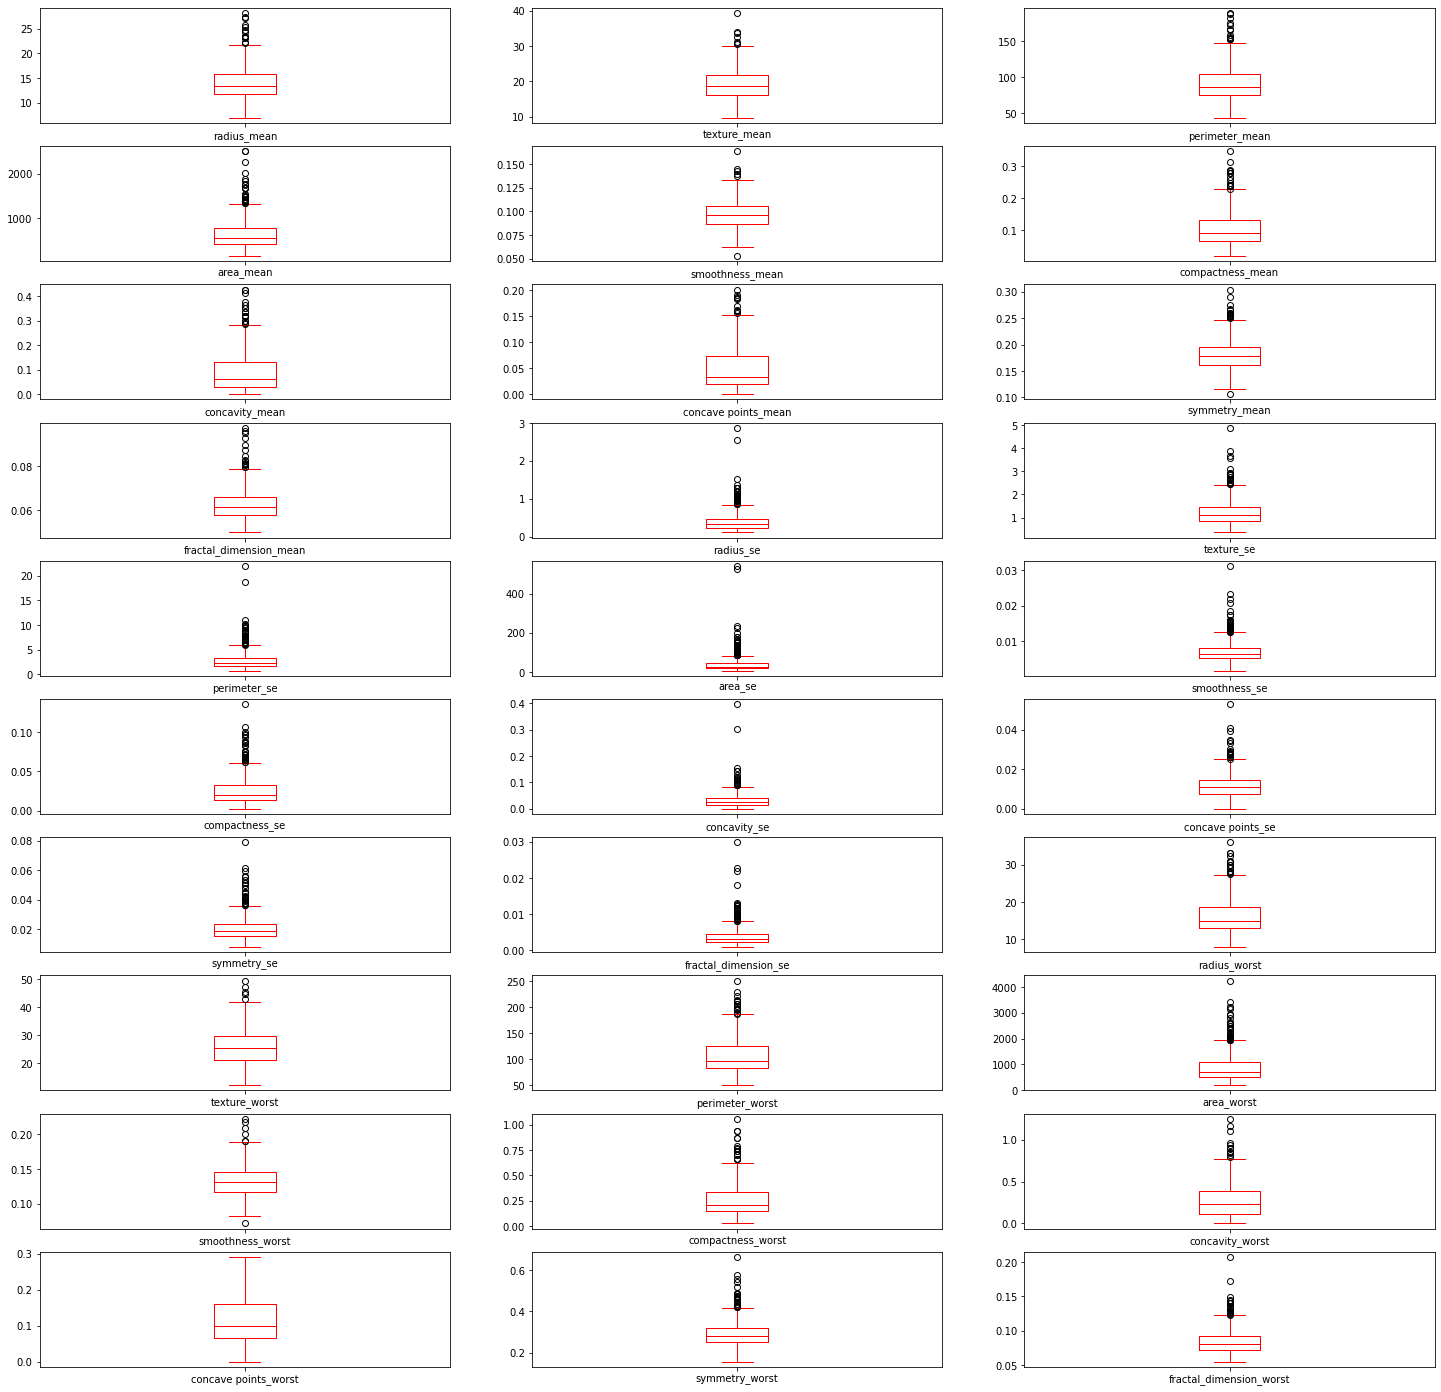

In [58]:
cancer_df.drop(["id"], axis=1).plot(kind='box',subplots=True,layout=(10,3),color='red',figsize=(25,25))
plt.show

- outliner removal using DBSCAN

In [216]:
from sklearn import datasets
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer_df)
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(data_scaled)
print(Counter(dbscan.labels_), '\n')

Counter({-1: 569}) 



No influencant outliners 

- outliner removal using zscore

In [187]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(cancer_df))
threshold=3
cancer_new_df=cancer_df[(z<3).all(axis=1)]

In [188]:
cancer_new_df.shape

(487, 32)

In [189]:
cancer_df.shape

(569, 32)

The percentage of data loss after outliner removal is : 

In [190]:
percentage_loss=((569-487)/569)*100
print(percentage_loss)

14.411247803163443


If the outliners are removed using zscore , we loose 14% of the data , so we can continue with outliners.

# VI-  Model selection 

# 1- Variable standardisation :

In [217]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

# 2- Data split 

In [218]:
from sklearn import model_selection
X_train_plus_valid, X_test, y_train_plus_valid, y_test \
    = sklearn.model_selection.train_test_split(X,  cancer_df["diagnosis"], random_state=0, \
                                    train_size = 0.7)
X_train, X_valid, y_train, y_valid \
    = sklearn.model_selection.train_test_split(X_train_plus_valid, \
                                        y_train_plus_valid, \
                                        random_state=0, \
                                        train_size = 0.5/0.7)

# 3- models 

In [219]:
models = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier(),
    SVC(),
    LogisticRegression()
]

for model in models:
    pipeline = make_pipeline(StandardScaler(), model)  # Scale the features for certain models
    pipeline.fit(X_train, y_train)
    pred_train = pipeline.predict(X_train)
    pred_valid = pipeline.predict(X_valid)
    pred_test = pipeline.predict(X_test)

    print("\033[1m" + 'Accuracy score of', model, 'is : ' + "\033[0m")  # Make the line bold
    print("Training accuracy:", accuracy_score(y_train, pred_train) * 100)
    print("Validation accuracy:", accuracy_score(y_valid, pred_valid) * 100)
    print("Testing accuracy:", accuracy_score(y_test, pred_test) * 100)
    print("*******************************************************************")
    print('\n')

Accuracy score of DecisionTreeClassifier() is : 
Training accuracy: 100.0
Validation accuracy: 90.35087719298247
Testing accuracy: 91.22807017543859
*******************************************************************


Accuracy score of KNeighborsClassifier() is : 
Training accuracy: 97.53521126760563
Validation accuracy: 95.6140350877193
Testing accuracy: 94.73684210526315
*******************************************************************


Accuracy score of RandomForestClassifier() is : 
Training accuracy: 100.0
Validation accuracy: 97.36842105263158
Testing accuracy: 95.32163742690058
*******************************************************************


Accuracy score of AdaBoostClassifier() is : 
Training accuracy: 100.0
Validation accuracy: 95.6140350877193
Testing accuracy: 95.32163742690058
*******************************************************************


Accuracy score of GradientBoostingClassifier() is : 
Training accuracy: 100.0
Validation accuracy: 92.98245614035088
Tes

There is problem of overfitting and also the classes in the target variable are umbalanced so it is better to use cross fold validation 

In [220]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import resample
from sklearn.metrics import classification_report

models = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier(),
    SVC(),
    LogisticRegression()
]

for model in models:
    pipeline = make_pipeline(StandardScaler(), model)  # Scale the features for certain models

    # Perform resampling to address class imbalance
    X_resampled, y_resampled = resample(X_train, y_train, random_state=0)

    # Perform cross-validation to estimate model performance
    scores = cross_val_score(pipeline, X_resampled, y_resampled, cv=5, scoring='accuracy')

    print("\033[1m" + 'Accuracy score of', model, 'is : ' + "\033[0m")  # Make the line bold
    print("Cross-validated accuracy:", scores.mean() * 100)
    print("*******************************************************************")
    print('\n')

Accuracy score of DecisionTreeClassifier() is : 
Cross-validated accuracy: 93.32706766917292
*******************************************************************


Accuracy score of KNeighborsClassifier() is : 
Cross-validated accuracy: 97.18045112781954
*******************************************************************


Accuracy score of RandomForestClassifier() is : 
Cross-validated accuracy: 98.2456140350877
*******************************************************************


Accuracy score of AdaBoostClassifier() is : 
Cross-validated accuracy: 97.89473684210526
*******************************************************************


Accuracy score of GradientBoostingClassifier() is : 
Cross-validated accuracy: 95.0751879699248
*******************************************************************


Accuracy score of BaggingClassifier() is : 
Cross-validated accuracy: 95.0814536340852
*******************************************************************


Accuracy score of SVC() is : 
Cr

According to the obtained results SVC and logistic regression models are the best one in classification. But we need to do Hyperparameter tuning

# 4- Hyperparameter tuning of the chosen models 

In [221]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Create a dictionary of hyperparameters for SVC
svc_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Create a dictionary of hyperparameters for LogisticRegression
logreg_params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Perform grid search for SVC
svc_grid = GridSearchCV(SVC(), svc_params, cv=5)
svc_grid.fit(X_train, y_train)

# Perform grid search for LogisticRegression
logreg_grid = GridSearchCV(LogisticRegression(), logreg_params, cv=5)
logreg_grid.fit(X_train, y_train)

# Get the best hyperparameters for SVC
best_svc = svc_grid.best_estimator_

# Get the best hyperparameters for LogisticRegression
best_logreg = logreg_grid.best_estimator_

# Make predictions on the test data using the best models
y_pred_svc = best_svc.predict(X_test)
y_pred_logreg = best_logreg.predict(X_test)

# Evaluate the accuracy of the models
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print("Accuracy for SVC:", accuracy_svc)
print("Accuracy for LogisticRegression:", accuracy_logreg)
print("Best hyperparameters for SVC:", best_svc)
print("Best hyperparameters for LogisticRegression:", best_logreg)

Accuracy for SVC: 0.9473684210526315
Accuracy for LogisticRegression: 0.9649122807017544
Best hyperparameters for SVC: SVC(C=1, kernel='linear')
Best hyperparameters for LogisticRegression: LogisticRegression(C=0.1)


According to this study the best model is logistic regression with parameter C= 0.1

In [229]:
best_log_Reg = LogisticRegression(C=0.1)
best_log_Reg.fit(X_train, y_train)
# Make a set of predictions for the validation data
y_pred = best_log_Reg.predict(X_valid)

# Print performance details
accuracy = sklearn.metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(sklearn.metrics.classification_report(y_valid, y_pred))

# Print nicer confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix


Predicted,0,1,All
True,,,
0,73,2,75
1,1,38,39
All,74,40,114


In [223]:
auc_score = roc_auc_score(y_valid, y_pred)
auc_score

0.9738461538461539

In [224]:
fpr, tpr, thresholds = roc_curve(y_valid, y_pred)

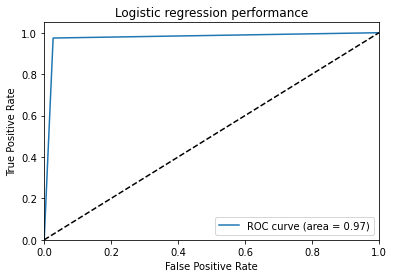

In [225]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic regression performance')
plt.legend()
plt.show()

- The power of the classification :   

In [235]:
from statsmodels.stats.power import NormalIndPower

#  predictions on test set
y_pred =best_log_Reg.predict(X_test)

# accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate the power
nobs = len(y_test)  # Number of observations
effect_size = accuracy - 0.5  # Effect size (difference from random guessing)
alpha = 0.05  # Significance level

power_analysis = NormalIndPower()
power = power_analysis.power(effect_size=effect_size, nobs1=nobs, alpha=alpha)

print("Accuracy:", accuracy)
print("Power:", power)


Accuracy: 0.9649122807017544
Power: 0.9903297905723704


# Conclusion 

According to this study and using the following 30 features, logistic regression is the best model to have dataset classification into 2 types of cancers: 0. benign cancer (B) and 1. malignant cancer (M). Thi classification has accruacy equal to 96.5% and power equal to 99%.